In [2]:
# BC Data treatment
# Goal: to apply a noise reduction algorithm to BC data 

In [3]:
#1 - Download the data and aggregate it in one single csv file

In [4]:
# Step 1 - Enter in the rigth working directory where it is the data
# Command to check where we are working:

In [9]:
pwd

'C:\\Users\\Nuno Canha\\Desktop\\Python\\BC\\Data'

In [12]:
# To enter in the working folder: "cd" + "pathway of the folder"

In [13]:
cd C:\Users\Nuno Canha\Desktop\Python\BC\Data

C:\Users\Nuno Canha\Desktop\Python\BC\Data


In [39]:
pwd

'C:\\Users\\Nuno Canha\\Desktop\\Python\\BC\\Data'

In [16]:
# Step 2: Import packages and set the working directory

In [36]:
import pandas as pd

In [40]:
from glob import glob

In [41]:
# Use glob() to list all files that match a pattern and sort results

In [42]:
stock_files = sorted(glob('*.csv'))

In [43]:
# Check the files that were considered:
stock_files

['AE51-S6-1113_20170604-163800.csv',
 'AE51-S6-1113_20170605-104800.csv',
 'AE51-S6-1113_20170605-105400.csv',
 'AE51-S6-1113_20170605-200400.csv',
 'AE51-S6-1113_20170606-122300.csv',
 'AE51-S6-1113_20170606-122500.csv',
 'AE51-S6-1113_20170606-163700.csv',
 'AE51-S6-1113_20170607-221700.csv',
 'AE51-S6-1113_20170609-194900.csv',
 'AE51-S6-1113_20170609-224500.csv',
 'AE51-S6-1113_20170611-194000.csv',
 'AE51-S6-1113_20170612-183500.csv',
 'AE51-S6-1113_20170615-221500.csv',
 'AE51-S6-1113_20170616-111000.csv',
 'AE51-S6-1113_20170616-124000.csv',
 'AE51-S6-1113_20170617-023000.csv',
 'AE51-S6-1113_20170617-223000.csv',
 'AE51-S6-1113_20170617-231500.csv',
 'AE51-S6-1113_20170618-130000.csv',
 'AE51-S6-1113_20170618-202000.csv',
 'AE51-S6-1113_20170622-084000.csv',
 'AE51-S6-1113_20170622-111000.csv',
 'AE51-S6-1113_20170622-134500.csv',
 'AE51-S6-1113_20170624-131000.csv',
 'AE51-S6-1113_20170626-191500.csv',
 'AE51-S6-1113_20170628-130500.csv']

In [44]:
# Use a generator expression to read the files, assign(), to create a new column (name of file to control), and concat() to concat all files

In [60]:
# NOTES: skype rows with non-essential info for data analysis
    # assign() will create a column with the file name of the data source (to random check)
    # skiprows=15 -> will only consider the data on line 16 (starting with columns' name)
    # ignore_index will provide continues index number between files

In [56]:
data = pd.concat((pd.read_csv(file,skiprows=15).assign(filename = file)
          for file in stock_files), ignore_index = True)

In [57]:
# Check the data:
data.head()

,Date,Time,Ref,Sen,ATN,Flow,PCB temp,Status,Battery,BC,filename
0,2017/06/04,16:38:00,918601,919795,-0.130,149,20,0,100,NaN,AE51-S6-1113_20170604-163800.csv
1,2017/06/04,16:39:00,918659,919902,-0.135,148,20,0,100,-204.0,AE51-S6-1113_20170604-163800.csv
2,2017/06/04,16:40:00,918685,920007,-0.144,149,21,0,100,-327.0,AE51-S6-1113_20170604-163800.csv
3,2017/06/04,16:41:00,918611,919951,-0.146,149,21,0,100,-75.0,AE51-S6-1113_20170604-163800.csv
4,2017/06/04,16:42:00,918509,919822,-0.143,148,21,0,100,112.0,AE51-S6-1113_20170604-163800.csv


In [58]:
# check the number of rows of the dataframe:
print(len(data))

12485


In [61]:
# To check if the files were merged correctly, try to check some specific files. 
data[1000:1030]

,Date,Time,Ref,Sen,ATN,Flow,PCB temp,Status,Battery,BC,filename
1000,2017/06/05,09:18:00,923312,922313,0.108,148,13,0,47,-37.0,AE51-S6-1113_20170604-163800.csv
1001,2017/06/05,09:19:00,923327,922339,0.107,149,13,0,47,-46.0,AE51-S6-1113_20170604-163800.csv
1002,2017/06/05,09:20:00,923300,922316,0.107,149,13,0,47,-16.0,AE51-S6-1113_20170604-163800.csv
1003,2017/06/05,09:21:00,923180,922205,0.106,148,13,0,47,-37.0,AE51-S6-1113_20170604-163800.csv
1004,2017/06/05,09:22:00,923249,922279,0.105,149,13,0,47,-21.0,AE51-S6-1113_20170604-163800.csv
1005,2017/06/05,09:23:00,923248,922291,0.104,149,13,0,46,-54.0,AE51-S6-1113_20170604-163800.csv
1006,2017/06/05,09:24:00,923272,922335,0.102,149,13,0,46,-83.0,AE51-S6-1113_20170604-163800.csv
1007,2017/06/05,10:48:00,916930,913231,0.404,149,29,0,82,NaN,AE51-S6-1113_20170605-104800.csv
1008,2017/06/05,10:49:00,910947,907529,0.376,149,34,0,82,-1079.0,AE51-S6-1113_20170605-104800.csv
1009,2017/06/05,10:50:00,910638,907346,0.362,149,36,0,83,-525.0,AE51-S6-1113_20170605-104800.csv


In [62]:
# Descriptive statistics
data.describe()

,Ref,Sen,ATN,Flow,PCB temp,Status,Battery,BC
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12459.000000
mean,911936.896516,894044.079776,1.987518,143.772287,27.475290,0.066640,94.302924,8.980255
std,8166.665991,12655.244539,0.881296,26.365140,11.133535,0.356717,16.542171,182.840480
min,889976.000000,867218.000000,-0.222000,0.000000,2.000000,0.000000,0.000000,-1079.000000
25%,906481.000000,884088.000000,1.510000,148.000000,20.000000,0.000000,100.000000,-28.000000
50%,911645.000000,892352.000000,2.049000,149.000000,26.000000,0.000000,100.000000,6.000000
75%,917736.000000,901830.000000,2.418000,149.000000,35.000000,0.000000,100.000000,41.000000
max,929004.000000,924128.000000,4.537000,151.000000,53.000000,2.000000,100.000000,14837.000000


In [74]:
# Writing data to a file with all the date
# define output filename
output_fp = 'AE51-S6-1113_July2017.csv'

# Save dataframe to csv
data.to_csv(output_fp, sep=',', index = False)
# "index = False" will remove the column index

In [113]:
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[12,6]

In [108]:
data['Timestamp'] = pd.to_datetime(data['Date'] + " " + data['Time'])
data.head()

,Date,Time,Ref,Sen,ATN,Flow,PCB temp,Status,Battery,BC,filename,Timestamp
0,2017/06/04,16:38:00,918601,919795,-0.130,149,20,0,100,NaN,AE51-S6-1113_20170604-163800.csv,2017-06-04 16:38:00
1,2017/06/04,16:39:00,918659,919902,-0.135,148,20,0,100,-204.0,AE51-S6-1113_20170604-163800.csv,2017-06-04 16:39:00
2,2017/06/04,16:40:00,918685,920007,-0.144,149,21,0,100,-327.0,AE51-S6-1113_20170604-163800.csv,2017-06-04 16:40:00
3,2017/06/04,16:41:00,918611,919951,-0.146,149,21,0,100,-75.0,AE51-S6-1113_20170604-163800.csv,2017-06-04 16:41:00
4,2017/06/04,16:42:00,918509,919822,-0.143,148,21,0,100,112.0,AE51-S6-1113_20170604-163800.csv,2017-06-04 16:42:00


In [123]:
# To create a new dataframe called "plot_BC" with only the columns "Timestamp" and "BC":

plot_BC=data[['Timestamp','BC']]

# To check if new dataframe is ok:
plot_BC.head()

,Timestamp,BC
0,2017-06-04 16:38:00,NaN
1,2017-06-04 16:39:00,-204.0
2,2017-06-04 16:40:00,-327.0
3,2017-06-04 16:41:00,-75.0
4,2017-06-04 16:42:00,112.0


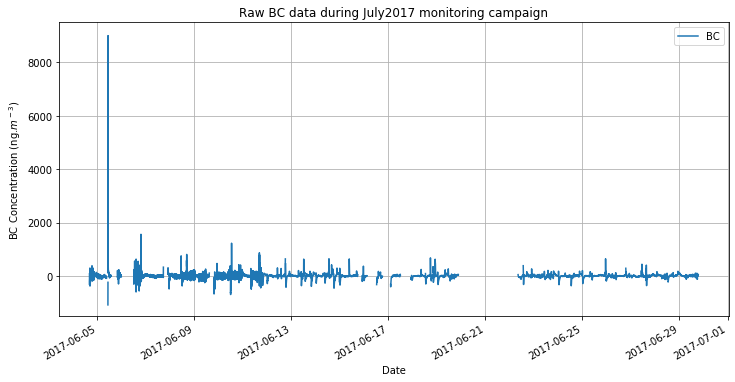

In [183]:
ax1 = plot_BC.plot('Timestamp', 'BC', title = 'Raw BC data during July2017 monitoring campaign',
                   ylim=[-1500,9500])
ax1.set_xlabel('Date')
ax1.set_ylabel('BC Concentration (ng.$m^-$$^3$)')
ax1.grid(True)


In [141]:
selection = data[['Timestamp','BC','ATN']]

In [142]:
selection.head()

,Timestamp,BC,ATN
0,2017-06-04 16:38:00,NaN,-0.130
1,2017-06-04 16:39:00,-204.0,-0.135
2,2017-06-04 16:40:00,-327.0,-0.144
3,2017-06-04 16:41:00,-75.0,-0.146
4,2017-06-04 16:42:00,112.0,-0.143


In [144]:
# Writing data to a file with all the date
# define output filename
output_selection = 'AE51-S6-July17-selection.csv'

# Save dataframe to csv
selection.to_csv(output_selection, sep=',', index = False)
# "index = False" will remove the column index

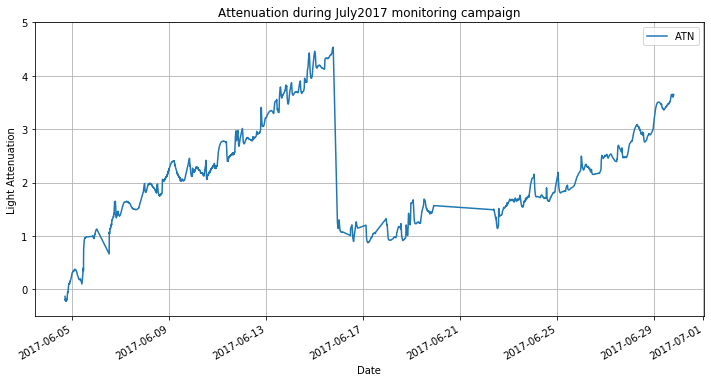

In [182]:
ax2=data.plot('Timestamp','ATN', title = 'Attenuation during July2017 monitoring campaign',
                   ylim=[-0.5,5.0])
ax2.set_xlabel('Date')
ax2.set_ylabel('Light Attenuation')
ax2.grid(True)

In [162]:
# Check the number of occurencis of negative concentrations of BC:

neg=data[['BC']].agg(lambda x: sum(x < 0)).sum()

In [164]:
# Total number of concentrations values available for BC:
total=len(data)
print(total)

12485


In [178]:
# Calculate the percentage of BC negative values:
pneg = neg/total*100
print("The percentage of negative BC values in the dataset is", pneg.round(0).astype(int), "%." )

The percentage of negative BC values in the dataset is 44 %.
